In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qutip import *
from tqdm import tqdm
import time
from qutip.ui.progressbar import BaseProgressBar

In [3]:
### DEFINE SYSTEM OPERATORS
N = 2 #for spin 1/2
N_spin = 8

qeye_list = [qeye(N) for i in range(N_spin)] #identity matrices
sigmax_list = [] #list of pauli operators for each spin
sigmay_list = []
sigmaz_list = []

for i in range(N_spin): #setup list of annihilation operators
    '''
    E.g. For three oscillators, this builds the list 
    [tensor(a,qeye,qeye), tensor(qeye,a,qeye), tensor(qeye,qeye,a)]
    '''
    
    temp1 = qeye_list.copy()
    temp1[i] = sigmax() 
    sigmax_list.append(tensor(temp1))
    
    temp2 = qeye_list.copy()
    temp2[i] = sigmay() 
    sigmay_list.append(tensor(temp2))
    
    temp3 = qeye_list.copy()
    temp3[i] = sigmaz() 
    sigmaz_list.append(tensor(temp3))

In [4]:
def spin_chain_H(N_spin,J,h):
    
    H_int = 0
    for j in range(N_spin-1):
        H_int += J/2 * (sigmax_list[j]*sigmax_list[j+1] + sigmay_list[j]*sigmay_list[j+1])
    
    H_field = 0
    for j in range(N_spin):
        H_field = h * sigmaz_list[j]
        
    return H_int + H_field

In [5]:
def stochastic_solve(H,gamma,times):

    ntraj=50
    L = np.sqrt(gamma) * sigmaz_list[2] 
    
    rho0 = tensor([fock(N, 0) for i in range(N_spin)])
    
    c_ops = []
    sc_ops = [L]
    e_ops = [sigmaz_list[0], sigmaz_list[7]]
    
    opt = Options()
    opt.store_states = False
    result = smesolve(H, rho0, times, c_ops, sc_ops,
                  e_ops, ntraj=ntraj, nsubsteps=50, solver="platen",
                  m_ops=[(L + L.dag())], dW_factors=[1/np.sqrt(gamma)],
                  method='homodyne', store_measurement=True, normalize=True,
                  map_func=parallel_map, options=opt)
    return result 

In [11]:
spin_chain_H(N_spin,1,1).eigenstates()

(array([-5.27663900e+00, -5.16370499e+00, -4.63142823e+00, -4.51849422e+00,
        -4.42944974e+00, -4.31651574e+00, -3.95555883e+00, -3.84262483e+00,
        -3.81961704e+00, -3.78423898e+00, -3.70668304e+00, -3.67130497e+00,
        -3.46627376e+00, -3.41714521e+00, -3.35333976e+00, -3.31034806e+00,
        -3.30421120e+00, -3.19741406e+00, -3.17440628e+00, -3.10836958e+00,
        -3.06147227e+00, -2.99543557e+00, -2.97242779e+00, -2.85949379e+00,
        -2.82106300e+00, -2.77665617e+00, -2.77193444e+00, -2.70812899e+00,
        -2.66372216e+00, -2.65900044e+00, -2.61908451e+00, -2.56995596e+00,
        -2.50615051e+00, -2.49853688e+00, -2.46315881e+00, -2.45702195e+00,
        -2.38560287e+00, -2.35022481e+00, -2.32721702e+00, -2.21428302e+00,
        -2.14519360e+00, -2.13144540e+00, -2.09606504e+00, -2.03225959e+00,
        -2.01851139e+00, -2.00925181e+00, -1.98313104e+00, -1.97387374e+00,
        -1.96012326e+00, -1.92946691e+00, -1.92474519e+00, -1.89631781e+00,
        -1.8

In [10]:
Qobj(np.matmul(sigmaz_list[2],spin_chain_H(N_spin,1,1))).eigenstates()

(array([-4.29324971-1.95952263e-15j, -4.29324971-1.17111228e-15j,
        -3.90741815+1.69503990e-15j, -3.90741815+1.34633574e-15j,
        -3.47187495+9.89186610e-17j, -3.47187495+3.78934757e-16j,
        -3.33165754+5.99082546e-16j, -3.33165754+1.46572935e-16j,
        -3.16538028-3.13223655e-15j, -3.16538028+8.04597569e-16j,
        -3.09129496+1.00597829e-15j, -3.09129496-4.62252984e-16j,
        -2.96490424+7.79996091e-17j, -2.96490424-3.00385671e-15j,
        -2.78004323-3.61012218e-16j, -2.78004323+1.17324089e-15j,
        -2.7584781 -7.99588843e-16j, -2.7584781 +8.76063788e-16j,
        -2.51988616-1.27169796e-15j, -2.51988616-2.91938044e-15j,
        -2.50236718-8.27556257e-16j, -2.50236718-7.75481043e-16j,
        -2.39582512+1.24653215e-16j, -2.39582512-6.18631698e-16j,
        -2.26563001+1.21383891e-15j, -2.26563001-3.09466355e-15j,
        -2.16414743-6.02084571e-16j, -2.16414743+1.84901815e-15j,
        -2.15354209-4.88454689e-16j, -2.15354209-1.57386186e-16j,
        -2

In [6]:
H = spin_chain_H(N_spin,np.pi,1)
gamma = 0.7
times = np.linspace(0,20,101)
result = stochastic_solve(H,gamma,times)

10.0%. Run time: 176.03s. Est. time left: 00:00:26:24
20.0%. Run time: 306.50s. Est. time left: 00:00:20:25
30.0%. Run time: 448.34s. Est. time left: 00:00:17:26
40.0%. Run time: 592.36s. Est. time left: 00:00:14:48
50.0%. Run time: 725.62s. Est. time left: 00:00:12:05
60.0%. Run time: 730.89s. Est. time left: 00:00:08:07
70.0%. Run time: 866.66s. Est. time left: 00:00:06:11
80.0%. Run time: 1004.34s. Est. time left: 00:00:04:11
90.0%. Run time: 1132.53s. Est. time left: 00:00:02:05
100.0%. Run time: 1211.84s. Est. time left: 00:00:00:00
Total run time: 1211.97s


<IPython.core.display.Javascript object>


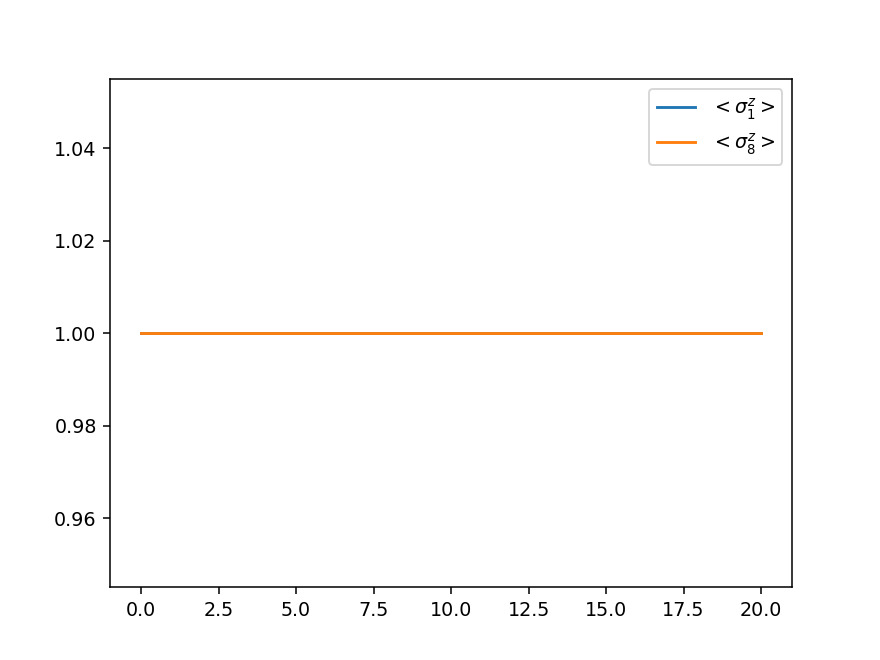

In [7]:
plt.figure()
plt.plot(times,result.expect[0],label='$<\sigma_1^z>$')
plt.plot(times,result.expect[1],label='$<\sigma_8^z>$')
plt.legend()

In [2]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, and Boxi Li
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.2
Numpy Version:      1.18.1
Scipy Version:      1.4.1
Cython Version:     0.29.15
Matplotlib Version: 3.1.3
Python Version:     3.7.6
Number of CPUs:     6
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Windows (AMD64)
Installation path:  C:\ProgramData\Anaconda3\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
